### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Se calcula el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [31]:
#Total_precio_tienda = sum(tienda['Precio'])
#Total_precio_tienda2 = sum(tienda2['Precio'])
#Total_precio_tienda3 = sum(tienda3['Precio'])
#Total_precio_tienda4 = sum(tienda4['Precio'])

def precio_tienda(tiendaX):
  sumaPrecio = sum(tiendaX['Precio'])
  costos = sum(tiendaX['Costo de envío'])
  total = int(sumaPrecio - costos)
  return total

Total_precio_tiendas = [precio_tienda(tienda),precio_tienda(tienda2),precio_tienda(tienda3),precio_tienda(tienda4)]
nombres = ['tienda', 'tienda2','tienda3','tienda4']

facturacion_total = sum(Total_precio_tiendas)

porc_total_precio_tiendas = []
for n in Total_precio_tiendas:
  porciento = (n / facturacion_total)*100
  porc_total_precio_tiendas.append(round(porciento, 2))

facturacion = list(zip(nombres,Total_precio_tiendas,porc_total_precio_tiendas))

print('La facturación de las tiendas se distribuyó de la siguiente manera:\n')
for i in range(len(facturacion)):
    print(f"El total de facturación de la {facturacion[i][0]} fue de {facturacion[i][1]} pesos con un porcentaje de {facturacion[i][2]}")




La facturación de las tiendas se distribuyó de la siguiente manera:

El total de facturación de la tienda fue de 1089502500 pesos con un porcentaje de 26.13
El total de facturación de la tienda2 fue de 1056858400 pesos con un porcentaje de 25.35
El total de facturación de la tienda3 fue de 1039503000 pesos con un porcentaje de 24.93
El total de facturación de la tienda4 fue de 983058300 pesos con un porcentaje de 23.58


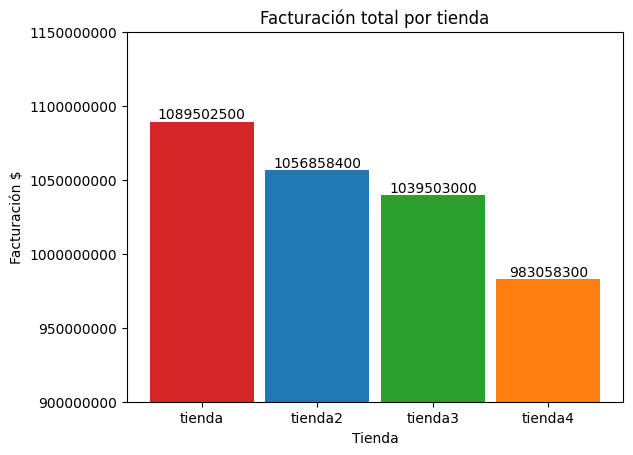

In [32]:
import matplotlib.pyplot as plt
# from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots()
bar_colors = ['tab:red','tab:blue','tab:green','tab:orange']
barras = ax.bar(nombres, Total_precio_tiendas, width= 0.9, color=bar_colors)
ax.set_ylabel('Facturación $')
ax.set_xlabel('Tienda')
ax.set_title('Facturación total por tienda')

ax.bar_label(barras, Total_precio_tiendas, label_type='edge')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(900000000, 1150000000)

plt.show()


# 2. Ventas por categoría

Se calcula la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [35]:
# Iterar sobre cada URL el cual esta almacenado en tienda y generar una tabla para cada tienda
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
  #df = pd.read_csv(url)
  suma_por_producto = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index().sort_values(by='Precio', ascending=False)

  print(f'Tabla generada para {nombre}:')
  print(suma_por_producto)
  print('\n')


Tabla generada para tienda_1:
    Categoría del Producto       Precio
3             Electrónicos  409476100.0
2        Electrodomésticos  283260200.0
7                  Muebles  192528900.0
4   Instrumentos musicales   75102400.0
1     Deportes y diversión   33350100.0
5                 Juguetes   20262200.0
0  Artículos para el hogar   15074500.0
6                   Libros    9321300.0


Tabla generada para tienda_2:
    Categoría del Producto       Precio
3             Electrónicos  410831100.0
2        Electrodomésticos  348567800.0
7                  Muebles  176426300.0
4   Instrumentos musicales  104990300.0
1     Deportes y diversión   34744500.0
5                 Juguetes   15945400.0
0  Artículos para el hogar   14746900.0
6                   Libros   10091200.0


Tabla generada para tienda_3:
    Categoría del Producto       Precio
3             Electrónicos  410775800.0
2        Electrodomésticos  329237900.0
7                  Muebles  201072100.0
4   Instrumentos musicales

# 3. Calificación promedio de la tienda


Se calcula las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

     Tienda  Calificacion Promedio
2  tienda 3               4.048326
1  tienda 2               4.037304
0  tienda 1               3.995759
3  tienda 4               3.995759


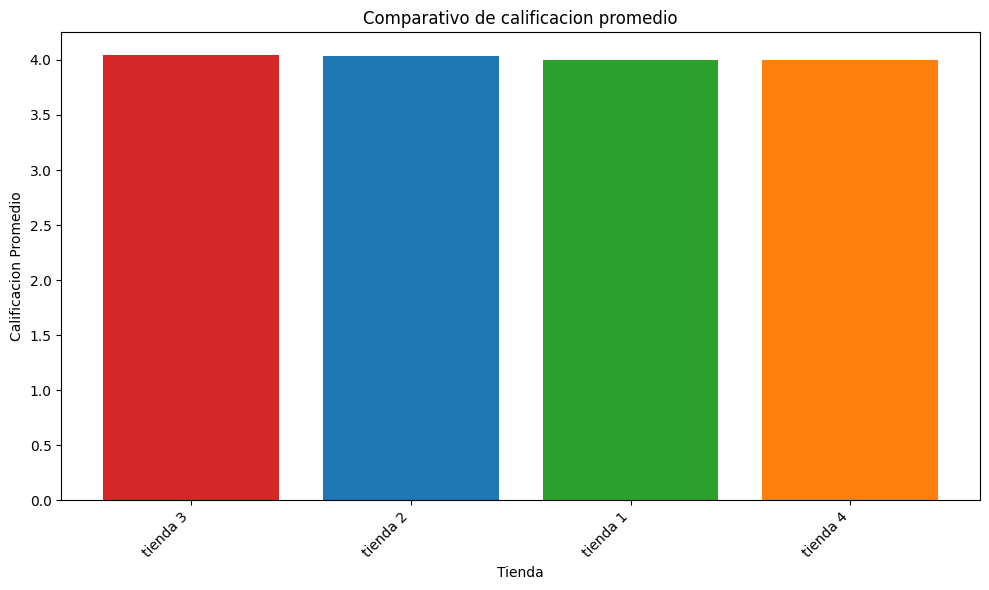

In [45]:

# Inicializar una lista para almacenar los resultados
calificaciones_promedio = []

# Iterar sobre cada URL y calcular la calificación promedio
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']):
  calificacion_promedio = tienda['Calificación'].mean()
  calificaciones_promedio.append({'Tienda': nombre, 'Calificacion Promedio': calificacion_promedio})

# Crear un DataFrame con los resultados
df_calificaciones_promedio = pd.DataFrame(calificaciones_promedio).sort_values(by='Calificacion Promedio', ascending=False)

print(df_calificaciones_promedio)

# Graficar comparativo de ventas

plt.figure(figsize=(10, 6))
bar_colors = ['tab:red','tab:blue','tab:green','tab:orange']
#barras = ax.bar(nombres, Total_precio_tiendas, width= 0.9, color=bar_colors)
plt.bar(df_calificaciones_promedio['Tienda'], df_calificaciones_promedio['Calificacion Promedio'], color=bar_colors)
plt.xlabel('Tienda')
plt.ylabel('Calificacion Promedio')
plt.title(f'Comparativo de calificacion promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

**Análisis:** En la tabla comparativa y la gráfica vemos que las tiendas con mejor calificación promedio son la 2 y la 3.



# 4. Productos más y menos vendidos

Los 5 productos más vendidos en tienda_1:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


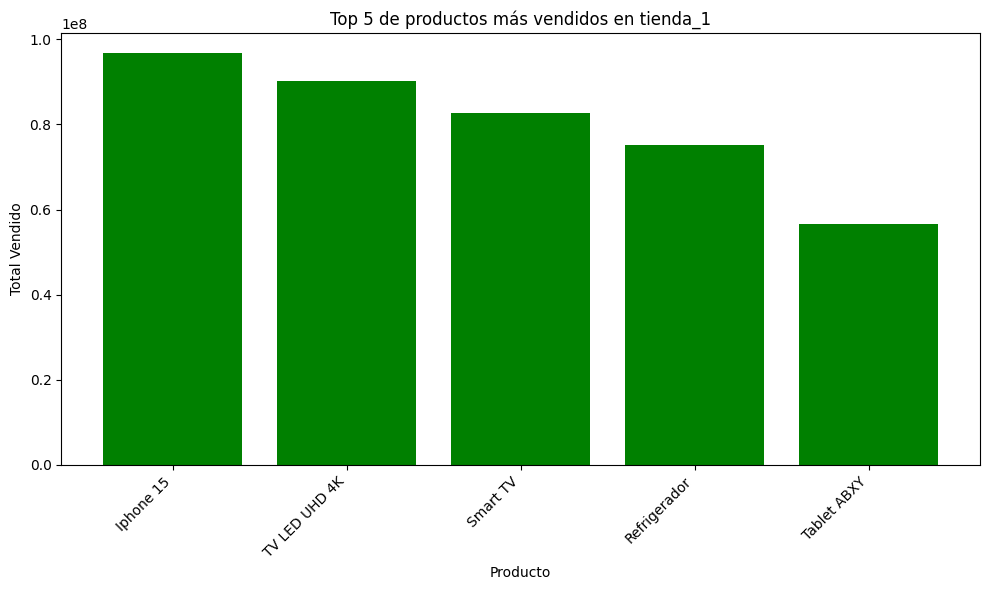



Los 5 productos más vendidos en tienda_2:
           Producto       Precio
0         Iphone 15  113225800.0
1     TV LED UHD 4K  103375000.0
2      Refrigerador   97632500.0
3  Lavadora de ropa   66762300.0
4          Smart TV   61142000.0


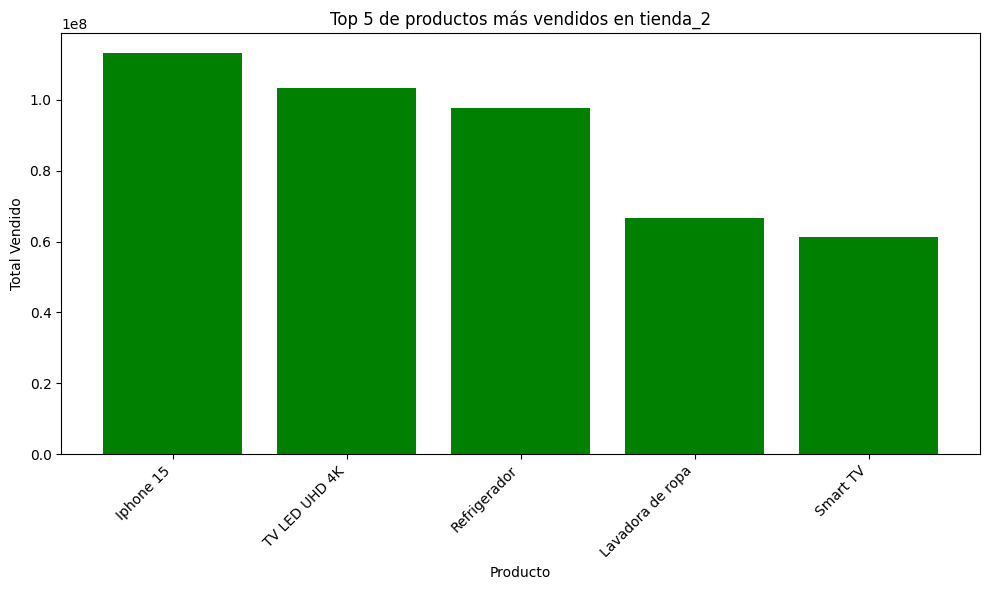



Los 5 productos más vendidos en tienda_3:
        Producto      Precio
0   Refrigerador  99889700.0
1  TV LED UHD 4K  96669100.0
2      Iphone 15  93225700.0
3       Smart TV  78837300.0
4   Lavavajillas  64364800.0


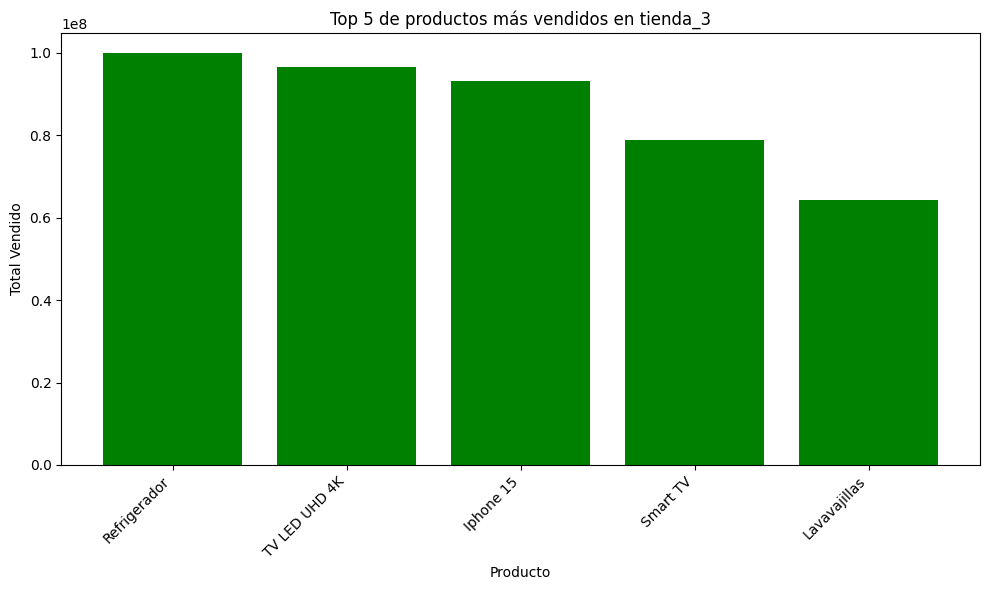



Los 5 productos más vendidos en tienda_4:
        Producto      Precio
0      Iphone 15  96697500.0
1  TV LED UHD 4K  90295300.0
2       Smart TV  82790400.0
3   Refrigerador  75271900.0
4    Tablet ABXY  56723100.0


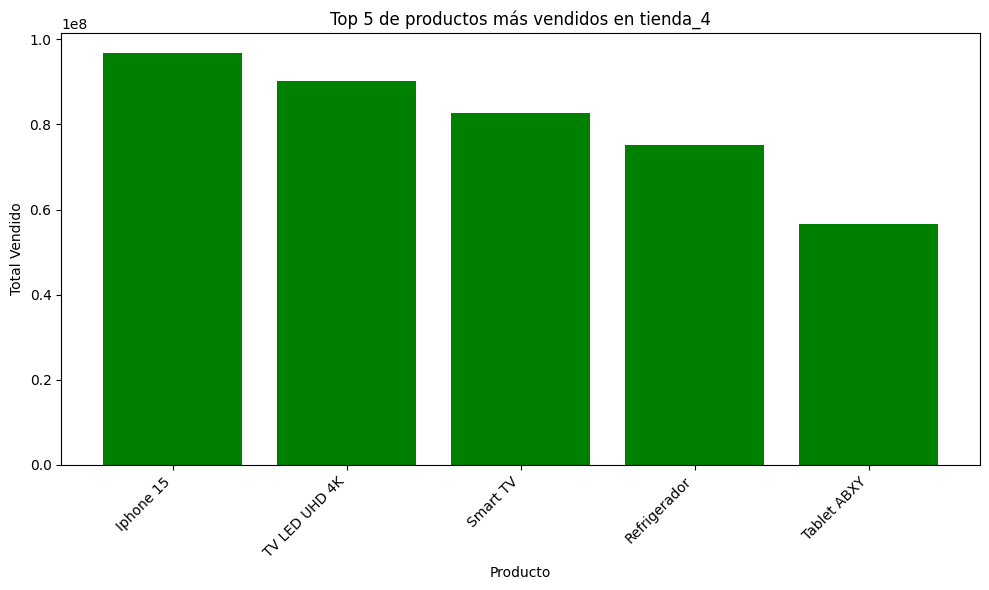

In [50]:

# Generar tablas y gráficas con los 5 articulos mas vendidos de cada tienda

# Iterar sobre cada URL y encontrar los 5 productos más vendidos
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
    top_5_productos = tienda.groupby('Producto')['Precio'].sum().nlargest(5).reset_index()
    print(f"Los 5 productos más vendidos en {nombre}:")
    print(top_5_productos)
# Graficar los 5 productos más vendidos

    plt.figure(figsize=(10, 6))
    plt.bar(top_5_productos['Producto'], top_5_productos['Precio'], color='green')
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido')
    plt.title(f'Top 5 de productos más vendidos en {nombre}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')

Los 5 productos menos vendidos en tienda_1:
             Producto     Precio
0  Cuerda para saltar   704800.0
1     Cubo mágico 8x8   748400.0
2      Dinosaurio Rex   858100.0
3   Ajedrez de madera  1075500.0
4        Set de vasos  1471800.0


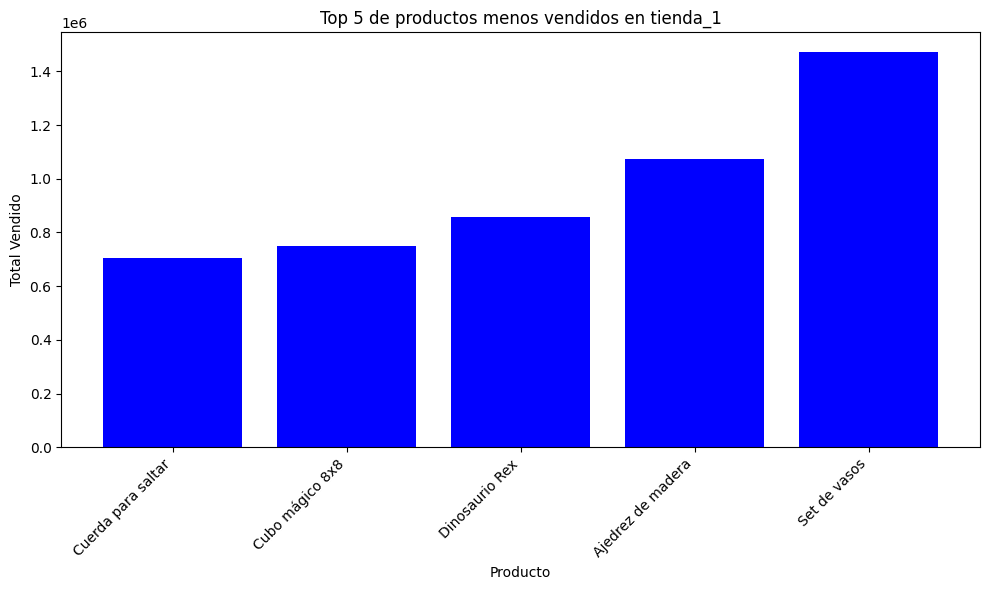



Los 5 productos menos vendidos en tienda_2:
             Producto     Precio
0     Cubo mágico 8x8   643600.0
1      Dinosaurio Rex   770300.0
2  Cuerda para saltar   856900.0
3   Ajedrez de madera  1287700.0
4        Set de vasos  1542600.0


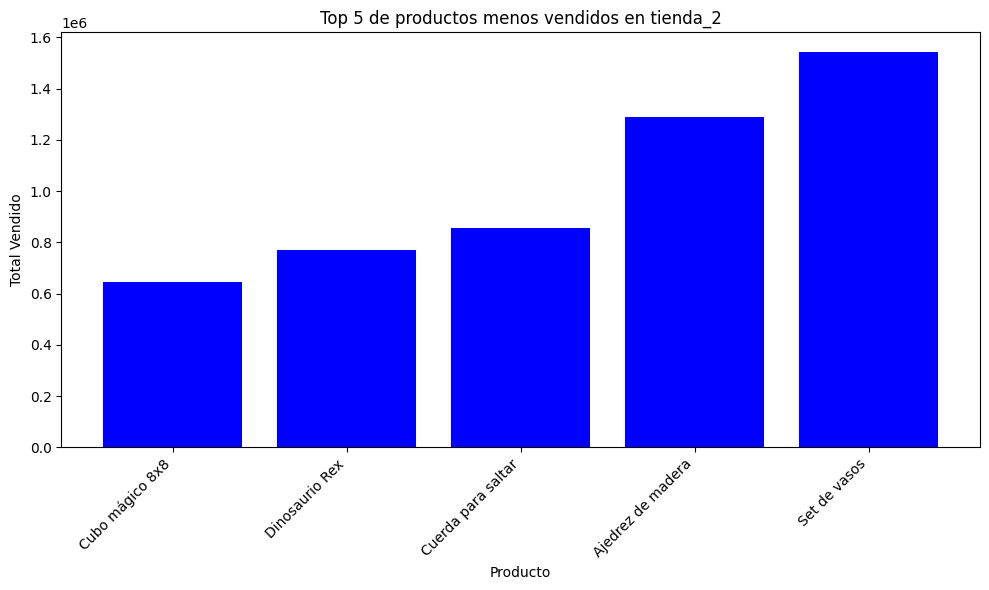



Los 5 productos menos vendidos en tienda_3:
                  Producto     Precio
0          Cubo mágico 8x8   640400.0
1           Dinosaurio Rex   795600.0
2       Cuerda para saltar   853800.0
3             Set de vasos  1210700.0
4  Bloques de construcción  1237200.0


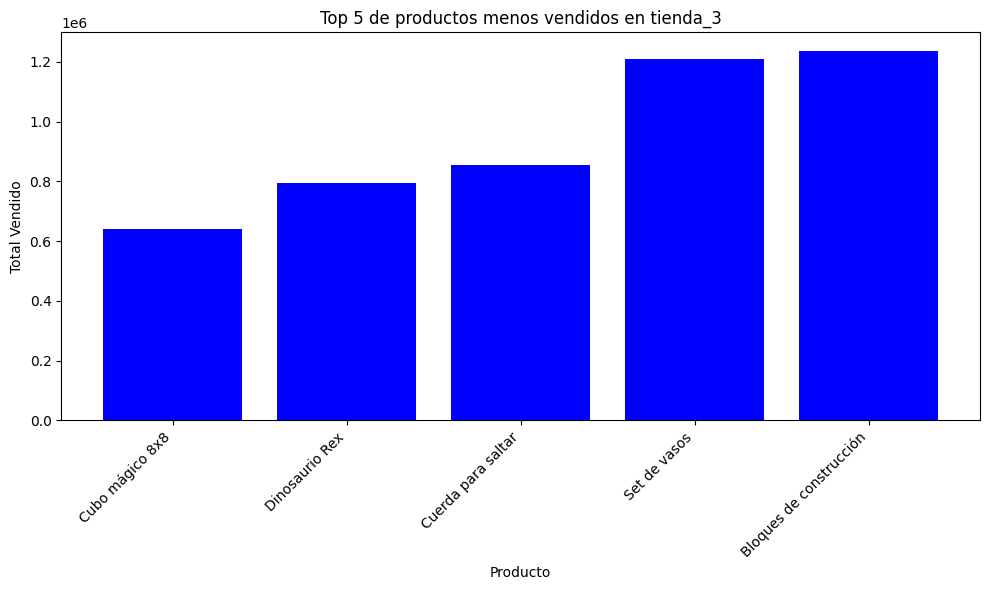



Los 5 productos menos vendidos en tienda_4:
             Producto     Precio
0  Cuerda para saltar   704800.0
1     Cubo mágico 8x8   748400.0
2      Dinosaurio Rex   858100.0
3   Ajedrez de madera  1075500.0
4        Set de vasos  1471800.0


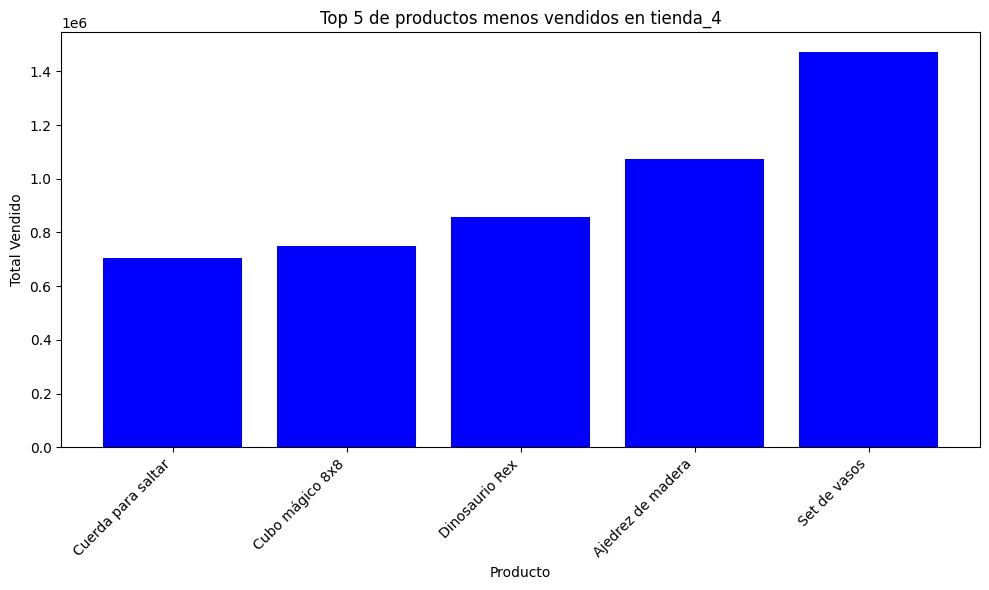

In [63]:
# Iterar sobre cada URL y encontrar los 5 productos más vendidos
for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda_1', 'tienda_2', 'tienda_3', 'tienda_4']):
    top_5_productos = tienda.groupby('Producto')['Precio'].sum().nsmallest(5).reset_index()
    print(f"Los 5 productos menos vendidos en {nombre}:")
    print(top_5_productos)
# Graficar los 5 productos más vendidos

    plt.figure(figsize=(10, 6))
    plt.bar(top_5_productos['Producto'], top_5_productos['Precio'], color='blue')
    plt.xlabel('Producto')
    plt.ylabel('Total Vendido')
    plt.title(f'Top 5 de productos menos vendidos en {nombre}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')

Porcentaje de ventas de los top 5 productos


In [54]:

for tienda, nombre in zip([tienda, tienda2, tienda3, tienda4], ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']):
    ventas_totales = tienda['Precio'].sum()
    top_5_productos = tienda.groupby('Producto')['Precio'].sum().nlargest(5)
    ventas_top_5 = top_5_productos.sum()
    porcentaje_top_5 = (ventas_top_5 / ventas_totales) * 100
    print(f"En {nombre}, el top 5 de productos representa el {porcentaje_top_5:.2f}% de las ventas totales.")

En tienda 1, el top 5 de productos representa el 38.69% de las ventas totales.
En tienda 2, el top 5 de productos representa el 39.61% de las ventas totales.
En tienda 3, el top 5 de productos representa el 39.43% de las ventas totales.
En tienda 4, el top 5 de productos representa el 38.69% de las ventas totales.


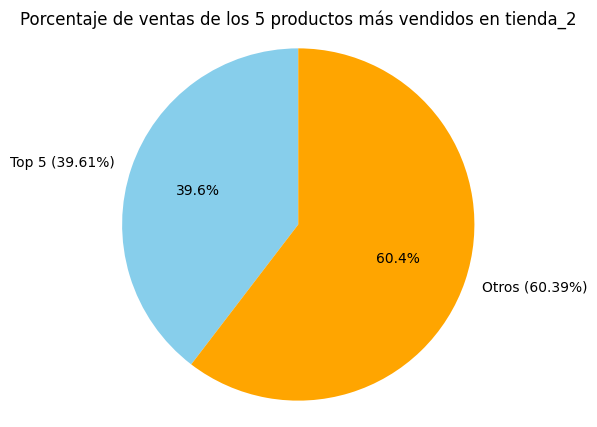

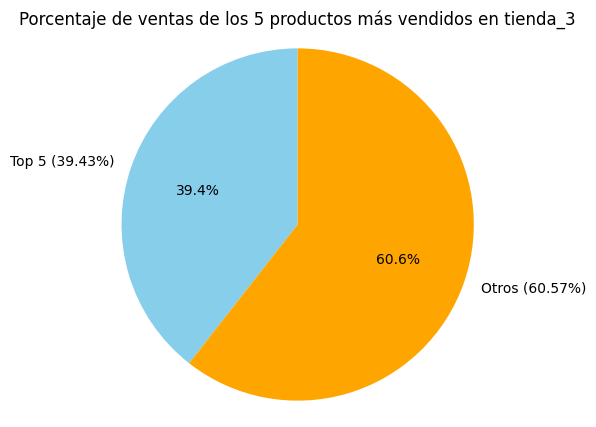

In [57]:
# Generar grafica para las tiendas 2 y 3
for tienda, nombre in zip([tienda2, tienda3], ['tienda_2', 'tienda_3']):
    ventas_totales = tienda['Precio'].sum()
    top_5_productos = tienda.groupby('Producto')['Precio'].sum().nlargest(5)
    ventas_top_5 = top_5_productos.sum()
    porcentaje_top_5 = (ventas_top_5 / ventas_totales) * 100

    plt.figure(figsize=(5, 5))
    plt.pie(
        [porcentaje_top_5, 100 - porcentaje_top_5],
        labels=[f'Top 5 ({porcentaje_top_5:.2f}%)', f'Otros ({100 - porcentaje_top_5:.2f}%)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'orange']
    )
    plt.title(f'Porcentaje de ventas de los 5 productos más vendidos en {nombre}')
    plt.axis('equal')
    plt.show()

se calcula el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [58]:
total_envios= {
    'tienda': sum(tienda['Costo de envío']),
    'tienda2': sum(tienda2['Costo de envío']),
    'tienda3': sum(tienda3['Costo de envío']),
    'tienda4': sum(tienda4['Costo de envío'])
}
total_envios

{'tienda': 58516600.0,
 'tienda2': 59485100.0,
 'tienda3': 58516600.0,
 'tienda4': 55317400.0}

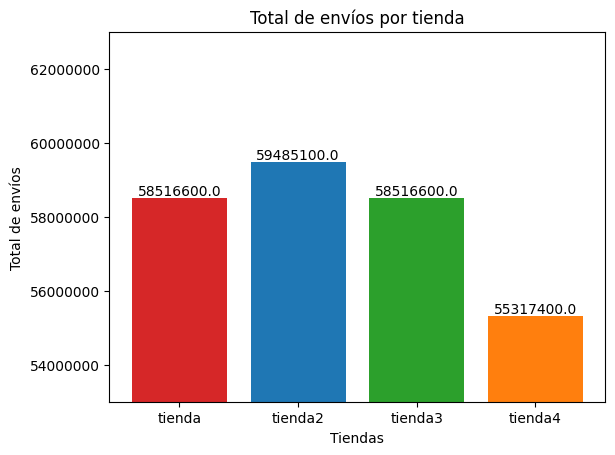

In [59]:
import matplotlib.pyplot as plt

tiendas = list(total_envios.keys())
envios = list(total_envios.values())
bar_colors = ['tab:red','tab:blue','tab:green','tab:orange']
plt.subplot()
barras = plt.bar(tiendas,envios,color=bar_colors)
plt.ylabel('Total de envíos')
plt.xlabel('Tiendas')
plt.title('Total de envíos por tienda')

plt.bar_label(barras, envios, label_type='edge')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylim(53000000, 63000000)

plt.show()


# **Análisis de los resultados obtenidos:**


El propósito de este informe es evaluar el rendimiento de cuatro tiendas en base a diferentes indicadores clave: ingresos totales, categorías y productos más y menos vendidos, calificaciones promedio de clientes, y costos de envío. El objetivo final es recomendar cuál de estas tiendas debería ser vendida, en caso de ser necesario desprenderse de una de ellas, optimizando la rentabilidad del portafolio comercial.

# **Análisis Detallado**
# 1. Ingresos Totales

| Tienda   | Facturación total (CLP) | % Participación |
| -------- | ----------------------- | --------------- |
| Tienda 1 | 1,089,502,500           | 26.13%          |
| Tienda 2 | 1,056,858,400           | 25.35%          |
| Tienda 3 | 1,039,503,000           | 24.93%          |
| Tienda 4 | 983,058,300             | 23.58%          |

Tienda 1 lidera en ingresos, seguida muy de cerca por Tienda 2 y Tienda 3. Tienda 4 muestra el rendimiento más bajo.

# 2. Categorías más y menos rentables
Categorías más facturadas en todas las tiendas:

*   Electrónicos
*   Electrodomésticos
*   Muebles
*   Categorías con menor ingreso:
*   Libros
*   Artículos para el hogar
*   Juguetes


Estas tendencias son consistentes entre todas las tiendas, lo que indica un comportamiento de compra homogéneo.

# 3. Calificación promedio de los clientes

| Tienda   | Calificación Promedio |
| -------- | --------------------- |
| Tienda 3 | 4.05                  |
| Tienda 2 | 4.04                  |
| Tienda 1 | 4.00                  |
| Tienda 4 | 4.00                  |

Aunque las calificaciones son similares, Tienda 3 destaca levemente por la mejor percepción del cliente.

# 4. Productos más y menos vendidos
Top productos más vendidos en casi todas las tiendas:
*  iPhone 15
*  TV LED UHD 4K
*  Smart TV
*  Refrigerador
*  Productos menos vendidos:
*  Cuerda para saltar
*  Cubo mágico 8x8
*  Dinosaurio Rex
*  Set de vasos
*  Ajedrez de madera

Los productos de bajo rendimiento son recurrentes en todas las tiendas, especialmente en la categoría de juguetes/artículos de hogar, y podrían eliminarse del catálogo.

# 5. Costo total de envío
| Tienda   | Costo total de envío (CLP) |
| -------- | -------------------------- |
| Tienda 2 | 59,485,100                 |
| Tienda 1 | 58,516,600                 |
| Tienda 3 | 58,516,600                 |
| Tienda 4 | 55,317,400                 |

Tienda 4 tiene el menor costo de envío, aunque también es la que menos factura, lo que podría explicarse por un menor volumen de ventas.

# Conclusión y Recomendación

Justificación:
Es la tienda con menor facturación total (23.58%), lo que indica un menor rendimiento comercial.

Aunque mantiene una buena estructura de categorías, sus ingresos en todas las líneas son consistentemente más bajos.

Su calificación promedio es la más baja, aunque empata con Tienda 1 (4.00), lo que muestra menos diferenciación positiva en experiencia del cliente.

Tiene el menor costo de envío, pero esto se debe más a un menor volumen de operaciones que a eficiencia logística real.

Tiene los mismos productos poco rentables que las demás tiendas, sin compensar con productos estrella mejor posicionados.

# ¿Qué tiendas deben mantenerse?

Tienda 1: Mejor facturación general.

Tienda 2: Buena facturación y mejor desempeño logístico.

Tienda 3: Mejor percepción de los clientes.